# Assignment 10
<b> Question 1 . Write a unique paragraph (5-6 sentences) about your favorite topic (e.g., sports, technology, food, books, etc.).</b>

1. Convert text to lowercase and remove punctuation using re.
2. Tokenize the text into words and sentences.
3. Split using split() and word_tokenize() and compare how Python split and NLTK’s word_tokenize() differ.
4. Remove stopwords (using NLTK's stopwords list).
5. Display word frequency distribution (excluding stopwords).

In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter
from nltk import FreqDist

from IPython.display import display, Markdown

# Original paragraph
text = """
Books have always been a doorway to different worlds. Whether it’s a gripping mystery or a heartwarming memoir, 
reading allows the mind to travel without moving an inch. 
The beauty of books lies in their power to stir emotions, spark imagination, and deepen understanding. 
In an age of screens and noise, books offer a quiet refuge and a deeper connection to oneself. 
They remain timeless companions, ready to offer wisdom, adventure, or comfort with every turn of a page."""

print('Originial paragraph:\n')
# Display formatted text
display(Markdown(text))

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

Originial paragraph:




Books have always been a doorway to different worlds. Whether it’s a gripping mystery or a heartwarming memoir, 
reading allows the mind to travel without moving an inch. 
The beauty of books lies in their power to stir emotions, spark imagination, and deepen understanding. 
In an age of screens and noise, books offer a quiet refuge and a deeper connection to oneself. 
They remain timeless companions, ready to offer wisdom, adventure, or comfort with every turn of a page.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Adminn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Adminn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Using split(): ['books', 'have', 'always', 'been', 'a', 'doorway', 'to', 'different', 'worlds', 'whether']
Using word_tokenize(): ['books', 'have', 'always', 'been', 'a', 'doorway', 'to', 'different', 'worlds', 'whether']

<FreqDist with 45 samples and 48 outcomes>

Filtered Words: ['books', 'always', 'doorway', 'different', 'worlds', 'whether', 'gripping', 'mystery', 'heartwarming', 'memoir', 'reading', 'allows', 'mind', 'travel', 'without', 'moving', 'inch', 'beauty', 'books', 'lies', 'power', 'stir', 'emotions', 'spark', 'imagination', 'deepen', 'understanding', 'age', 'screens', 'noise', 'books', 'offer', 'quiet', 'refuge', 'deeper', 'connection', 'oneself', 'remain', 'timeless', 'companions', 'ready', 'offer', 'wisdom', 'adventure', 'comfort', 'every', 'turn', 'page']

Word Frequencies:
FreqDist({'books': 3, 'offer': 2, 'always': 1, 'doorway': 1, 'different': 1, 'worlds': 1, 'whether': 1, 'gripping': 1, 'mystery': 1, 'heartwarming': 1, ...})


<Axes: title={'center': 'Top 10 Word Frequencies (Excluding Stopwords)'}, xlabel='Samples', ylabel='Counts'>

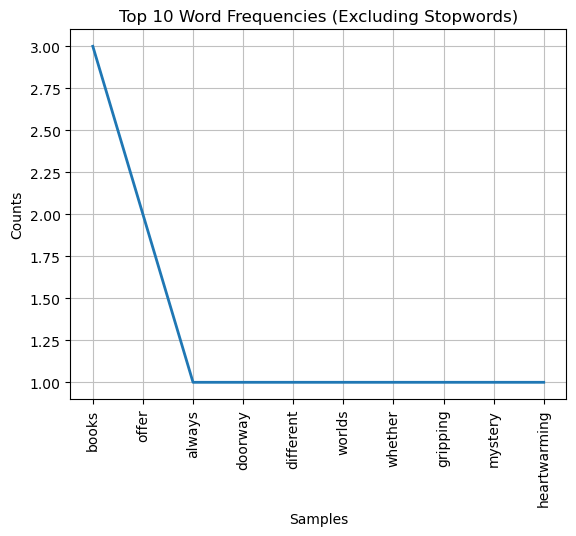

In [5]:
text_lower = text.lower()
text_clean = re.sub(r'[^\w\s]', '', text_lower)

# 2. Tokenize into sentences and words
sentences = sent_tokenize(text_clean)
words_nltk = word_tokenize(text_clean)

# 3. Tokenize using split() and word_tokenize()
words_split = text_clean.split()
print("Using split():", words_split[:10])
print("Using word_tokenize():", words_nltk[:10])
print()
# Split() breaks on whitespace; word_tokenize() considers word boundaries more precisely

# 4. Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words_nltk if word not in stop_words]

# 5. Display word frequency (excluding stopwords)
freq_dist = FreqDist(filtered_words)
print(freq_dist)
print()
print("Filtered Words:", filtered_words)
print()
print("Word Frequencies:")
freq_dist.pprint()
freq_dist.plot(10, title='Top 10 Word Frequencies (Excluding Stopwords)')

<b> Question 2. Using the same paragraph from Q1:</b>

1. Extract all words with only alphabets using re.findall().
2. Remove stop words using NLTK’s stopword list.
3. Perform stemming with PorterStemmer.
4. Perform lemmatization with WordNetLemmatizer.
5. Compare the stemmed and lemmatized outputs and explain when you’d prefer one over the other.

In [9]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer

# 1. Alphabetic words only
alpha_words = re.findall(r'\b[a-zA-Z]+\b', text)

# 2. Remove stopwords
alpha_filtered = [w for w in alpha_words if w.lower() not in stop_words]

# 3. Stemming
stemmer = PorterStemmer()
stemmed = [stemmer.stem(w) for w in alpha_filtered]

# 4. Lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
lemmatized = [lemmatizer.lemmatize(w) for w in alpha_filtered]

# 5. Compare
print("Stemmed:", stemmed)
print()
print("Lemmatized:", lemmatized)

# We'd prefer using stemming for fast, rough keyword matching in search engines, and
# lemmatization for grammar-sensitive tasks like summarization and chatbot responses.

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Adminn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Adminn\AppData\Roaming\nltk_data...


Stemmed: ['book', 'alway', 'doorway', 'differ', 'world', 'whether', 'grip', 'mysteri', 'heartwarm', 'memoir', 'read', 'allow', 'mind', 'travel', 'without', 'move', 'inch', 'beauti', 'book', 'lie', 'power', 'stir', 'emot', 'spark', 'imagin', 'deepen', 'understand', 'age', 'screen', 'nois', 'book', 'offer', 'quiet', 'refug', 'deeper', 'connect', 'oneself', 'remain', 'timeless', 'companion', 'readi', 'offer', 'wisdom', 'adventur', 'comfort', 'everi', 'turn', 'page']

Lemmatized: ['Books', 'always', 'doorway', 'different', 'world', 'Whether', 'gripping', 'mystery', 'heartwarming', 'memoir', 'reading', 'allows', 'mind', 'travel', 'without', 'moving', 'inch', 'beauty', 'book', 'lie', 'power', 'stir', 'emotion', 'spark', 'imagination', 'deepen', 'understanding', 'age', 'screen', 'noise', 'book', 'offer', 'quiet', 'refuge', 'deeper', 'connection', 'oneself', 'remain', 'timeless', 'companion', 'ready', 'offer', 'wisdom', 'adventure', 'comfort', 'every', 'turn', 'page']


<b> Question 3. Choose 3 short texts of your own (e.g., different news headlines, product reviews).</b>

1. Use CountVectorizer to generate the Bag of Words representation.
2. Use TfidfVectorizer to compute TF-IDF scores.
3. Print and interpret the top 3 keywords from each text using TF-IDF.

In [12]:
texts = [
    "Electric vehicles are the future of sustainable transport.",
    "AI-driven tools are revolutionizing industries like healthcare and finance.",
    "Smartphones with foldable screens are redefining user experience."
]

In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Bag of Words
vectorizer = CountVectorizer()

# Step 2: Fit the vectorizer to your text and transform it
X = vectorizer.fit_transform(texts) 

# Step 3: Get feature names and display matrix
print("Bag of Words Representation")
print("Feature names:", vectorizer.get_feature_names_out())
print("Vectorized matrix:\n", X.toarray())
print()

# TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(texts)
feature_names = tfidf.get_feature_names_out()
print("TF-IDF Scores:")
print(feature_names)
print(tfidf_matrix.toarray())
print()

# Top 3 keywords per text
import numpy as np
for i, row in enumerate(tfidf_matrix.toarray()):
    top_indices = np.argsort(row)[::-1][:3]
    keywords = [feature_names[idx] for idx in top_indices]
    print(f"Text {i+1} Top Keywords:", keywords)

Bag of Words Representation
Feature names: ['ai' 'and' 'are' 'driven' 'electric' 'experience' 'finance' 'foldable'
 'future' 'healthcare' 'industries' 'like' 'of' 'redefining'
 'revolutionizing' 'screens' 'smartphones' 'sustainable' 'the' 'tools'
 'transport' 'user' 'vehicles' 'with']
Vectorized matrix:
 [[0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0]
 [1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1]]

TF-IDF Scores:
['ai' 'and' 'are' 'driven' 'electric' 'experience' 'finance' 'foldable'
 'future' 'healthcare' 'industries' 'like' 'of' 'redefining'
 'revolutionizing' 'screens' 'smartphones' 'sustainable' 'the' 'tools'
 'transport' 'user' 'vehicles' 'with']
[[0.         0.         0.21786941 0.         0.36888498 0.
  0.         0.         0.36888498 0.         0.         0.
  0.36888498 0.         0.         0.         0.         0.36888498
  0.36888498 0.         0.36888498 0.         0.36888498 0.        ]
 [0.32705548 0.32705548 

In [16]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Download NLTK resources (first time only)
nltk.download('punkt')
nltk.download('stopwords')

# Paragraphs
text1 = """Artificial Intelligence is a branch of computer science dedicated to building intelligent machines.
These systems mimic human behavior, enabling them to make autonomous decisions.
AI finds wide applications in robotics, healthcare, and customer support.
It enhances productivity by automating repetitive and complex tasks."""

text2 = """Blockchain is a decentralized digital ledger that securely records transactions across a distributed network.
It underpins cryptocurrencies like Bitcoin and ensures transparency and immutability.
By reducing the risk of fraud, blockchain fosters trust in data-driven processes.
It holds transformative potential in sectors like voting, healthcare, and supply chain management."""

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Adminn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Adminn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Preprocessing and Tokenization

In [19]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    return text

def tokenize_and_clean(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(preprocess(text))
    return [t for t in tokens if t not in stop_words]

tokens1 = tokenize_and_clean(text1)
tokens2 = tokenize_and_clean(text2)

print("Tokens (AI):\n", tokens1)
print()
print("Tokens (Blockchain):\n", tokens2)

Tokens (AI):
 ['artificial', 'intelligence', 'branch', 'computer', 'science', 'dedicated', 'building', 'intelligent', 'machines', 'systems', 'mimic', 'human', 'behavior', 'enabling', 'make', 'autonomous', 'decisions', 'ai', 'finds', 'wide', 'applications', 'robotics', 'healthcare', 'customer', 'support', 'enhances', 'productivity', 'automating', 'repetitive', 'complex', 'tasks']

Tokens (Blockchain):
 ['blockchain', 'decentralized', 'digital', 'ledger', 'securely', 'records', 'transactions', 'across', 'distributed', 'network', 'underpins', 'cryptocurrencies', 'like', 'bitcoin', 'ensures', 'transparency', 'immutability', 'reducing', 'risk', 'fraud', 'blockchain', 'fosters', 'trust', 'datadriven', 'processes', 'holds', 'transformative', 'potential', 'sectors', 'like', 'voting', 'healthcare', 'supply', 'chain', 'management']


### Jaccard Similarity
<b>Formula:</b><br>
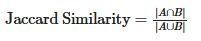

In [21]:
def jaccard_similarity(set1, set2):
    intersection = set(set1).intersection(set2)
    union = set(set1).union(set2)
    return len(intersection) / len(union)

jaccard_score = jaccard_similarity(tokens1, tokens2)
print(f"Jaccard Similarity: {jaccard_score:.3f}")

Jaccard Similarity: 0.016


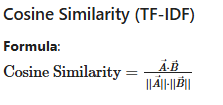

In [23]:
vectorizer = TfidfVectorizer(stop_words='english')
tfidf = vectorizer.fit_transform([text1, text2])
cosine_score = cosine_similarity(tfidf[0:1], tfidf[1:2])[0][0]
print(f"Cosine Similarity: {cosine_score:.3f}")

Cosine Similarity: 0.015


#### Analysis
The Jaccard similarity between the two texts was 0.016, indicating minimal word overlap due to distinct vocabularies used in AI and Blockchain. The cosine similarity was 0.015, slightly lower but more meaningful, as it considers term frequency and contextual relevance. Although both scores are low, cosine similarity provides better insight as it captures thematic similarities even when wording differs. This makes it more suitable for comparing texts with related ideas but varied terminology.

<b>Question 5. Write a short review for a product or service.</b>

1. Use TextBlob or VADER to find polarity & subjectivity for each review.
2. Classify reviews into Positive / Negative / Neutral.
3. Create a word cloud using the wordcloud library for all positive reviews.

In [33]:
review = """
I recently purchased the XYZ wireless earbuds and I'm thoroughly impressed. 
The sound quality is crystal clear, the bass is rich, and the battery life exceeds expectations. 
They’re also comfortable to wear for long durations. Absolutely great value for money!
"""

#### Sentiment Analysis using TextBlob

In [38]:
!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   --------------------------------------- 624.3/624.3 kB 11.7 MB/s eta 0:00:00


In [39]:
from textblob import TextBlob

# Analyze review
blob = TextBlob(review)
polarity = blob.sentiment.polarity
subjectivity = blob.sentiment.subjectivity

# Classification
if polarity > 0.1:
    sentiment = "Positive"
elif polarity < -0.1:
    sentiment = "Negative"
else:
    sentiment = "Neutral"

print(f"Polarity: {polarity:.2f}")
print(f"Subjectivity: {subjectivity:.2f}")
print(f"Sentiment: {sentiment}")

Polarity: 0.34
Subjectivity: 0.58
Sentiment: Positive


#### Word Cloud for Positive Reviews

In [49]:
!pip install wordcloud

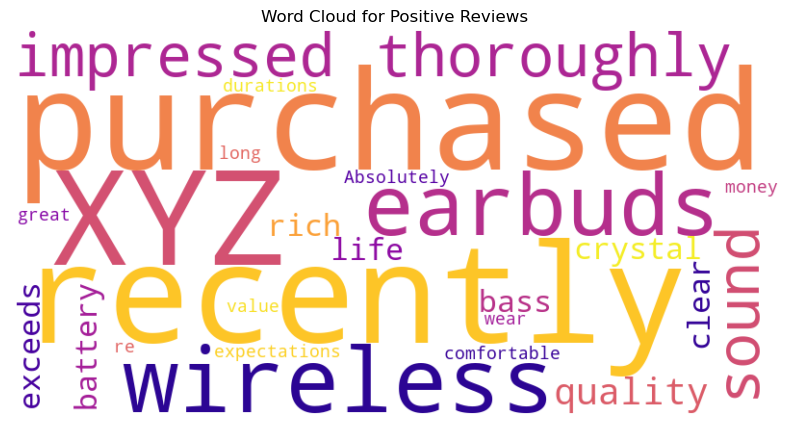

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Let's say this is the combined text of all positive reviews
positive_reviews_text = """
I recently purchased the XYZ wireless earbuds and I'm thoroughly impressed. 
The sound quality is crystal clear, the bass is rich, and the battery life exceeds expectations. 
They’re also comfortable to wear for long durations. Absolutely great value for money!
"""

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(positive_reviews_text)

# Plot it
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Positive Reviews")
plt.show()

<b>Question 6. Choose your own paragraph (~100 words) as training data.

1. Tokenize text using Tokenizer() from keras.preprocessing.text
2. Create input sequences and build a simple LSTM or Dense model.
3. Train the model and generate 2–3 new lines of text starting from any seed word you provide.

In [54]:
text="""The forest whispers softly in the arms of dawn. Golden sunlight dances on dew-kissed leaves, and a stream hums ancient lullabies.
            Birds compose a gentle chorus as petals awaken from sleep. Shadows stretch like memories across mossy stones, 
            while the wind tells forgotten tales. Silence is sacred here, echoing through time and trees. Life blooms without urgency — just presence. 
            Even the stillness breathes with purpose, holding space for reflection and renewal. Each rustling leaf, a page from nature’s book. 
            Each breeze, a sigh of the earth itself. 
            
            Beneath the canopy, the world slows down. 
            Time trickles gently with the water, flowing between rocks and roots. Fallen logs cradle sprouting ferns, 
            reminding us that endings often lead to new beginnings. The scent of pine and damp earth lingers in the air, grounding the soul in the now. 
            Birds glide effortlessly, painting invisible paths between branches. Light and shadow dance in harmony, 
            crafting a tapestry of momentary magic. Here, nature doesn’t hurry, yet everything is accomplished. 
            The forest teaches stillness not as emptiness, but as fullness — an embrace of all that is. 
            In this sacred space, every sound is a prayer, every sigh a story, and every breath a gift."""


#### Preprocessing and Tokenizing the text (training_text)

In [72]:
pip install tensorflow --no-cache-dir

In [75]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

# Convert entire text into sequence of tokens
token_list = tokenizer.texts_to_sequences([text])[0]

# Create input sequences
input_sequences = []
for i in range(1, len(token_list)):
    input_sequences.append(token_list[:i+1])

# Pad sequences
max_sequence_len = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')

# Prepare predictors and label
X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)


#### LSTM Model Creation and Training

In [77]:
import warnings
warnings.filterwarnings("ignore")

model = Sequential()
model.add(Embedding(total_words, 10, input_length=max_sequence_len-1))
model.add(LSTM(128, return_sequences=False))         # LSTM encodes the sequence
model.add(Dense(50, activation='relu'))              # Refines features
model.add(Dense(total_words, activation='softmax'))  # Predicts next word/char

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - accuracy: 0.0077 - loss: 4.9905
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.0580 - loss: 4.9834
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.0596 - loss: 4.9559
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.0512 - loss: 4.9235
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.0476 - loss: 4.9251
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.0553 - loss: 4.8443
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.0609 - loss: 4.8331
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.0504 - loss: 4.8384
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.0553 - loss: 4.7849
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.0451 - loss: 4.8053
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.0658 - loss: 4.7570
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy:

#### Generating text from seed

In [81]:
def generate_text(seed_text, next_words=10):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)[0]
        
        output_word = ''
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        if output_word:
            seed_text += ' ' + output_word
    return seed_text

# Generate text from different seeds
generated_text1 = generate_text("The forest whispers softly", next_words=10)
generated_text2 = generate_text("Stillness teaches us to", next_words=15)
generated_text3 = generate_text("The river hums a quiet song", next_words=15)
generated_text4 = generate_text("Through the gift of nature, life renews itself", next_words=20)

# Print the results
print("Generated Text 1:", generated_text1)
print("\nGenerated Text 2:", generated_text2)
print("\nGenerated Text 3:", generated_text3)
print("\nGenerated Text 4:", generated_text4)


Generated Text 1: The forest whispers softly in the arms of dawn golden sunlight dances on dew

Generated Text 2: Stillness teaches us to softly in the arms of dawn golden sunlight dances on dew leaves and a stream

Generated Text 3: The river hums a quiet song whispers softly the arms dawn golden sunlight dances on dew kissed leaves and a stream

Generated Text 4: Through the gift of nature, life renews itself dances on dew leaves and a stream stream hums ancient lullabies birds compose a gentle chorus chorus chorus petals awaken
